# Project 1


#### `Libraries`


In [158]:
import numpy as np
import matplotlib.pyplot as plt
import time

#### Solvers


1. Gauss Elimination


In [159]:
def GaussElimination(A:np.array,b:np.array):
    """Function that solves gauss elimination by elementry row operations
    
    Keyword arguments:
    A - np.array(): matrix
    b - np.array(): vector
    Return: A,b
    """
    
    n = len(A)
    for i in range(n-1):
        for j in range(i+1,n):
            factor = float(A[j][i]/A[i][i])
            for k in range(i,n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    x = np.zeros(n)
    for i in reversed(range(n)):
        s = 0
        for j in range(i+1,n):
            s += A[i][j] * x[j]
        x[i] = (b[i] - s) / A[i][i]

    return x


2. TDMA solver


In [160]:
def TDMA(d,l,u,b):
    """Function that solves TDMA
    
    Keyword arguments:
    d - np.array(): diagonal vector
    b - np.array(): known vector
    l - np.array(): lower diagonal vector
    u - np.array(): upper diagonal vector
    Return: x -> solution vector
    """
    
    n = len(d)
    for i in range(1, n):
        factor = l[i-1] / d[i-1]
        d[i] = d[i] - factor * u[i-1]
        b[i] = b[i] - factor * b[i-1]
    x = np.zeros(n)
    x[-1] = b[-1] / d[-1]

    for i in reversed(range(n-1)):
        x[i] = (b[i] - u[i] * x[i+1]) / d[i]

    return x

#### Plotters


In [161]:
def field_plotter(contour_vals):
    X, Y = np.meshgrid(contour_vals[0], contour_vals[1])
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, contour_vals[2], cmap='jet', levels=50)
    plt.colorbar(contour, label='Phi')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f'Contour Plot {contour_vals[3]} X {contour_vals[3]} grid')
    plt.show()

In [162]:
def CPU_Time(input_sizes, runtimes):
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, runtimes, marker='o', linestyle='-', color='b')
    plt.xlabel('Input Size')
    plt.ylabel('CPU Runtime (seconds)')
    plt.title('CPU Runtime vs Input Size')
    plt.grid(True)
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

##### Boundry Conditions and Source Term


In [163]:
phi_bottom = lambda y: 500 * np.exp((-50*(1 + y**2)))

phi_top = lambda y: 100 * (1 - y) + 500* np.exp((-50 * y ** 2))

phi_left = lambda x: 100 * x + 500 * np.exp(( -50 * (1 - x)**2))

phi_right = lambda x: 500 * np.exp(-50 * ((1 - x)**2 + 1))

source_term = lambda x,y:50000 * np.exp(-50 * ((1 - x)**2 + y**2)) * (100 * ((1 - x)**2 + y**2) - 2)

##### Generalized equation


In [164]:
def Matrix_Generation(N):
    delta = 1.0 / (N - 1)
    A = np.zeros((N*N,N*N))
    b = np.zeros(N*N)
    x = np.linspace(0,1,N)
    y = np.linspace(0,1,N)

    for i in range(N):
        for j in range(N):
            k = i * N + j

            b[k] += (delta**2)*source_term(x[i],y[j])

            A[k,k] = -4
            if j > 0:
                    A[k, k - 1] = 1
                    
            if j < N - 1:
                A[k, k + 1] = 1
            if i > 0:
                A[k, k - N] = 1
            if i < N - 1:
                A[k, k + N] = 1

            if i == 0:
                b[k] -= phi_bottom(j)
            if i == N-1:
                b[k] -= phi_top(j)
            if j == 0:
                b[k] -= phi_left(i)
            if j == N-1:
                b[k] -= phi_right(i)
    return A,b,x,y


## Solution using Gauss Elimination


In [ ]:
grid_points = [21,41,81]
runtimes = []
contour_vals = []

for N in grid_points:
    print(f"Running for grid size: {N} x {N}")
    start = time.time()
    A,b,x,y = Matrix_Generation(N)
    phi = GaussElimination(A,b)
    end = time.time()
    contour_vals.append((x,y,phi.reshape(N,N),N))
    runtimes.append(end-start)
CPU_Time(grid_points, runtimes)

In [ ]:
field_plotter(contour_vals[0])

In [ ]:
field_plotter(contour_vals[1])

In [ ]:
field_plotter(contour_vals[2])

## Solution using Gauss Siedel Itterative Method


In [181]:
def GaussSiedel(A,b, tol=1e-6):
    phi = np.zeros(N*N)
    residuals = []

    while(True):
        phi_old = np.copy(phi)
        
        for i in range(N):
            for j in range(N):
                k = i * N + j
                sum1 = A[k, :k].dot(phi[:k])
                sum2 = A[k, k+1:].dot(phi[k+1:])
                phi[k] = (b[k] - sum1 - sum2) / A[k, k]

        residual = np.linalg.norm(phi - phi_old)
        residuals.append(residual)
        print(residual)
        if (residual/max(residuals) < tol):
            break

    return phi.reshape(N, N), residuals


In [182]:
grid_points = [41,81,161]
runtimes = []
contour_vals = []

for N in grid_points:
    print(f"Running for grid size: {N} x {N}")
    start = time.time()
    A,b,x,y = Matrix_Generation(N)
    phi, residuals = GaussSiedel(A,b)
    end = time.time()
    contour_vals.append((x,y,phi,N))
    runtimes.append(end-start)
CPU_Time(grid_points, runtimes)

Running for grid size: 41 x 41
7062.6290428115935
3738.169393839863
2574.983236025128
1989.493642995553
1633.391907195898
1391.6627392744429
1215.6732655372653
1081.2006794778106
974.7483885594643
888.164276884609
816.215980116834
755.3820889006001
703.2007046396276
657.8959786329779
618.152972906076
582.9761499699555
551.5972365688092
523.4133971798487
497.94464814136956
474.80384649237254
453.6751095537994
434.2980160357661
416.4558525327909
399.96674218009326
384.6768604419824
370.45518479972725
357.18938702710784
344.78258711730894
333.1507643951327
322.2206751236142
311.9281642517234
302.216786630198
293.03667324430944
284.34359294740096
276.0981713223859
268.26523669203755
260.81326967797935
253.7139375969419
246.94169875891927
240.47346467018144
234.2883104465954
228.36722555888116
222.6928984729995
217.24952989987904
212.02267029287395
206.99907797738138
202.1665949023321
197.51403749672767
193.03110051854995
188.708272115838
184.53675859436615
180.50841761415302
176.6156987266

KeyboardInterrupt: 

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

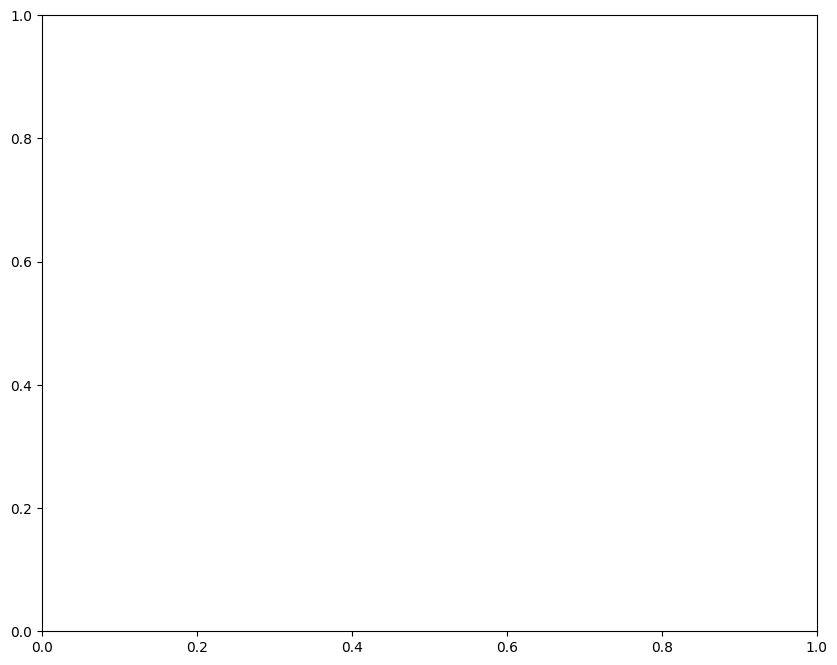

In [ ]:
field_plotter(contour_vals[0])